In [23]:
import os, sys, math
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

import pandas as pd

In [5]:
test = [
    (True,"weather is good!"),
    (True,"weather is great!"),
    (False,"what is the weather?"),
    (False,"what about the weather?")
]
test

[(True, 'weather is good!'),
 (True, 'weather is great!'),
 (False, 'what is the weather?'),
 (False, 'what about the weather?')]

In [19]:
from pygents.aigents_api import tokenize_re
from pygents.util import dictcount
from pygents.plot import plot_dict


In [18]:
all_dic = {}
cat_dic = {}
not_dic = {}

tokenized_text = []
for t in test:
    toks = tokenize_re(t[1])
    tokenized_text.append(toks)
    for tok in toks:
        dictcount(all_dic,tok)
        if t[0]:
            dictcount(cat_dic,tok)
        else:
            dictcount(not_dic,tok)
    
print(all_dic)
print(cat_dic)
print(not_dic)


{'weather': 4, 'is': 3, 'good': 1, '!': 2, 'great': 1, 'what': 2, 'the': 2, '?': 2, 'about': 1}
{'weather': 2, 'is': 2, 'good': 1, '!': 2, 'great': 1}
{'what': 2, 'is': 1, 'the': 2, 'weather': 2, '?': 2, 'about': 1}


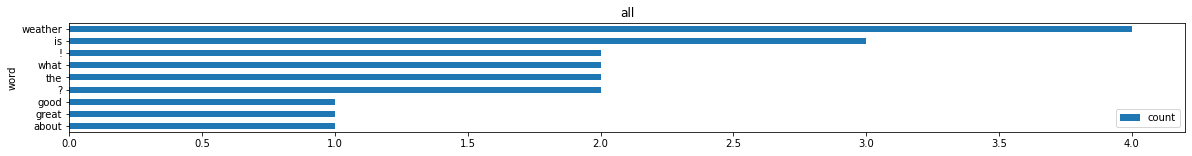

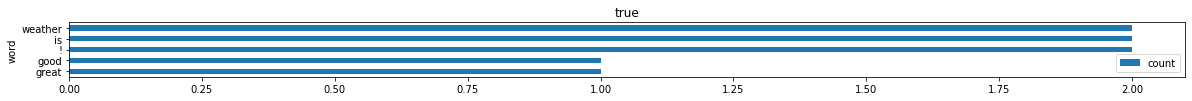

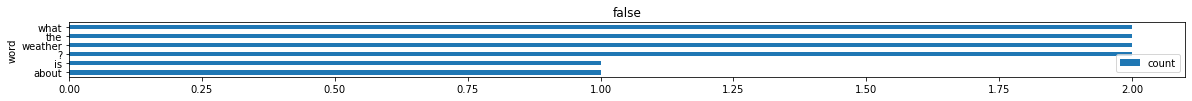

In [21]:
plot_dict(all_dic,"word","count","all")
plot_dict(cat_dic,"word","count","true")
plot_dict(not_dic,"word","count","false")
          

In [30]:
def dic2df(dic,df):
    df = pd.DataFrame([(key, dic[key]) for key in dic],columns=["word","count"])
    return df
                    

In [34]:
df_all = dic2df(all_dic,df)
df_all

,word,count
0,weather,4
1,is,3
2,good,1
3,!,2
4,great,1
5,what,2
6,the,2
7,?,2
8,about,1


In [35]:
df_cat = dic2df(cat_dic,df)
df_cat


,word,count
0,weather,2
1,is,2
2,good,1
3,!,2
4,great,1


In [38]:
list("hello world")

['h', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']